<div class="title">Supervised Learning: Case Study</div>
<div class="subtitle">Machine Learning</div>
<div class="author">Carlos María Alaíz Gudín &mdash; Universidad Autónoma de Madrid</div>

---
<div style="font-size: large; font-weight: bold; margin-left: 6em;"><p>Team Number and Names: <u>3: Enrique Juliá Arévalo, Sara Verde Camacho, Leo Pérez Peña</u></div>


**Configuration**

This cell defines the general configuration of Jupyter Notebook.

In [1]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

This cell imports the packages to be used.

In [12]:
# Standard packages.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

import sklearn.dummy

# Custom packages.
from ml import (
	evaluate_model_clas,
	plot_dataset_clas,
	save_predictions,
	show_function,
)

# Initialisations.
matplotlib.rc("figure", figsize=(15, 5))
sys.dont_write_bytecode = True

from sklearn.dummy import DummyClassifier


# Supervised Learning Case Study

## Introduction

This practical assignment is designed as a **Kaggle competition**.

Specifically, a **multiclass classification** dataset will be used, so that each team will compete to improve their predictions over an unlabeled partition of the dataset.

It is important to remark that **the grades will not depend on the obtained ranking**, but on the different approaches used to tackle the problem, on the design of the experiments and on the analysis of the results.

## Rubric

The following aspects will be taken into account when evaluating the assignment.


* Analyse the data.


* Preprocess the features automatically using *pipelines*.


* Adjust the hyper-parameters with a validation stage.


* Try different models to improve the performance, at least:
    * (Regularized) Logistic Regression.
    * SVC.
    * ANNs.


* Try interpretable models to check the important features (e.g. Lasso).


* Submit the prediction several times (the evolution of the performance will be also considered).


* Any other approach that may improve either the performance or interpretability of the model (e.g. feature selection, ensembles...).


* Analyse the results obtained after each experiment, and make decisions following the conclusions.

## Utilities

Some utilities are given next as a starting point, but the teams can defined any other tools that they may need.

### Team Number

The **number of the team** should be inserted here, so that the file of predictions has the appropriate name.

In [5]:
################################################################################
# The team number should be inserted here:
team_number = 3
################################################################################

### Evaluation of the Model

The following function evaluates a multiclass model (already fitted), computing and showing the accuracy and balanced accuracy over both the training and test partitions.

In [6]:
show_function(evaluate_model_clas)

```python
def evaluate_model_clas(model, x_tr, y_tr, x_te, y_te, print_table=True):
    y_tr_p = model.predict(x_tr)
    y_te_p = model.predict(x_te)

    er_tr = [accuracy_score(y_tr, y_tr_p), balanced_accuracy_score(y_tr, y_tr_p)]
    er_te = [accuracy_score(y_te, y_te_p), balanced_accuracy_score(y_te, y_te_p)]

    ers = [er_tr, er_te]
    headers = ["Acc", "Bal. Acc"]

    if print_table:
        print("{:>15}".format(""), end="")
        for h in headers:
            print("{:>15}".format(h), end="")
        print("")

        headers_col = ["Train", "Test"]

        cnt = 0
        for er in ers:
            hc = headers_col[cnt]
            cnt = cnt + 1
            print("{:<15}".format(hc), end="")

            for e in er:
                print("{:15.2f}".format(e), end="")
            print("")

    return ers
```

### Submission of the Predictions

The following function saves the predictions on the **challenge partition** to a file with syntax `Team_TT_YYYYMMDD-HHMMSS.pred`, where `TT` stands for the team number, and `YYYYMMDD-HHMMSS` is a timestamp to distinguish the different submissions of a team.

In [7]:
show_function(save_predictions)

```python
def save_predictions(y_ch_p, team_number, n_preds=500):
    if len(y_ch_p) != n_preds:
        print(
            "Error saving the predictions, it should be a vector of %d lables" % n_preds
        )
    else:
        time_str = time.strftime("%Y%m%d-%H%M%S")
        np.savetxt("Team_{:02d}_{}.txt".format(team_number, time_str), y_ch_p, fmt="%d")
```

Once the prediction file has been generated, it can be uploaded to Moodle.
It is important to **avoid renaming the files**.

## Dataset

A real dataset will be tackled in this practical assignment.
In particular, the [fetal health](https://www.kaggle.com/andrewmvd/fetal-health-classification) dataset of Kaggle, that aims to classify the fetal health in three classes:
1. Normal.
2. Suspect.
3. Pathological.

The input data are a set of $21$ variables extracted from the cardiotocographies (CTGs).

### Load of the Dataset

This cell loads the data, in particular three partitions:
1. A training partition, given by `x_tr` and `y_tr`, to train (and validate) the models.
2. A test partition, given by `x_te` and `y_te`, to estimate the performance of the model.
3. A challenge partition, given by `x_ch`. The real labels are unknown, and hence the predictions should be submitted to know the real performance of the model.

In [8]:
prefix = "./data/fetal_health"

x_tr = np.loadtxt(prefix + "_tr.dat")
x_te = np.loadtxt(prefix + "_te.dat")
x_ch = np.loadtxt(prefix + "_ch.dat")

y_tr = np.loadtxt(prefix + "_tr.lab")
y_te = np.loadtxt(prefix + "_te.lab")

features = [line.rstrip("\n") for line in open("./data/fetal_health.head")]
n_features = len(features)

### Initial Incomplete Analysis

Plot of the data over the first two features.

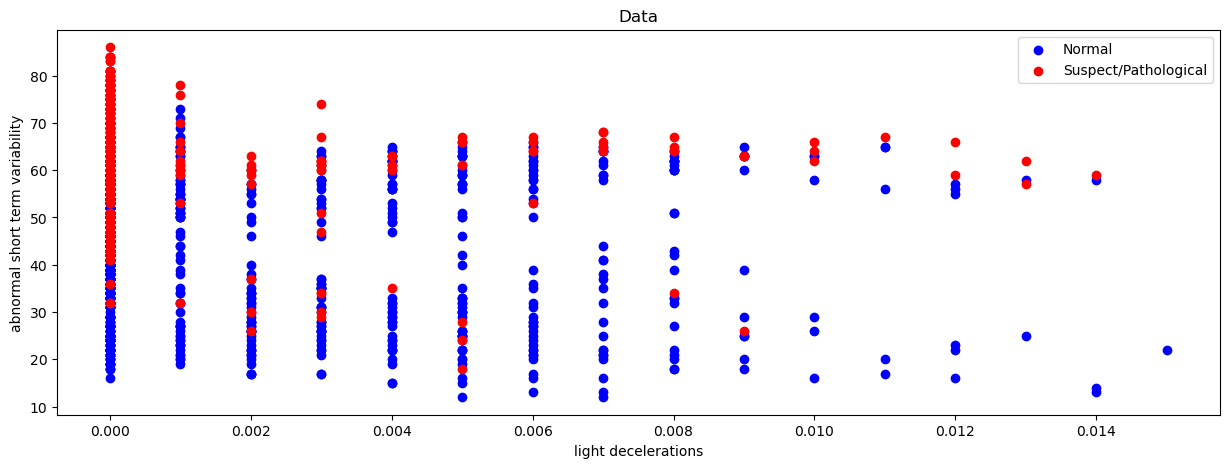

In [9]:
y_tr_binary = y_tr.copy()
y_tr_binary[y_tr == 3] = 2
plot_dataset_clas(x_tr, y_tr_binary)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(["Normal", "Suspect/Pathological"])
plt.axis("auto")
plt.show()

Balance of the dataset.

In [10]:
for lab in np.unique(y_tr):
    n_sam = np.sum(y_tr == lab)
    print(
        "Class {}: {:3d} samples ({:5.2f}%)".format(
            lab, n_sam, 100.0 * n_sam / len(y_tr)
        )
    )

Class 1.0: 877 samples (77.89%)
Class 2.0: 156 samples (13.85%)
Class 3.0:  93 samples ( 8.26%)


Dummy classifier: se calcula la salida más frecuente y esta será la salida que se de siempre, no tiene en cuenta el input.

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_tr, y_tr)
dummy_clf.predict(x_tr)
print(dummy_clf.score(x_tr, y_tr))

0.7788632326820604


In [18]:
evaluate_model_clas(dummy_clf, x_tr, y_tr, x_te, y_te)

                           Acc       Bal. Acc
Train                     0.78           0.33
Test                      0.78           0.33


[[0.7788632326820604, 0.3333333333333333], [0.778, 0.3333333333333333]]

In [19]:
y_ch = dummy_clf.predict(x_ch)
save_predictions(y_ch, 3)